In [54]:
import pathlib
from pathlib import Path
from datetime import datetime

In [55]:
experiments = Path('../../experiments/')

In [60]:
times = []
last_time = None
for experiment in experiments.iterdir():
    if not experiment.is_dir():
        continue
    for dataset in experiment.iterdir():
        for feature_set in dataset.iterdir():
            results = feature_set.joinpath('results')
            if results.exists() and results.is_dir():
#                 print(len(list(results.iterdir())))
                if len(list(results.iterdir())) > 0:
#                     start_time = min(datetime.fromtimestamp(file.stat().st_mtime) for file in feature_set.iterdir() if not file.is_dir() and file.name.endswith('.pkl'))
#                     end_time = max(datetime.fromtimestamp(file.stat().st_mtime) for file in results.iterdir())
#                     times.append(dict(experiment=experiment.name, dataset=dataset.name, feature_set=feature_set.name, 
#                         time=end_time, duration=end_time-start_time
#                     ))
                    if last_time is None:
                        times.append(dict(experiment=experiment.name, dataset=dataset.name, feature_set=feature_set.name, 
                            time=max(datetime.fromtimestamp(file.stat().st_mtime) for file in results.iterdir())
                        ))
                    else:
                        times.append(dict(experiment=experiment.name, dataset=dataset.name, feature_set=feature_set.name, 
                                          duration=max(datetime.fromtimestamp(file.stat().st_mtime) for file in results.iterdir())-last_time, 
                            time=max(datetime.fromtimestamp(file.stat().st_mtime) for file in results.iterdir())
                        ))
                    last_time = max(datetime.fromtimestamp(file.stat().st_mtime) for file in results.iterdir())

In [61]:
import pandas as pd
times_df = pd.DataFrame(times)

In [62]:
import numpy as np
times_df['duration_min'] = times_df.duration / np.timedelta64(1, 'm')

<AxesSubplot:xlabel='experiment', ylabel='duration_min'>

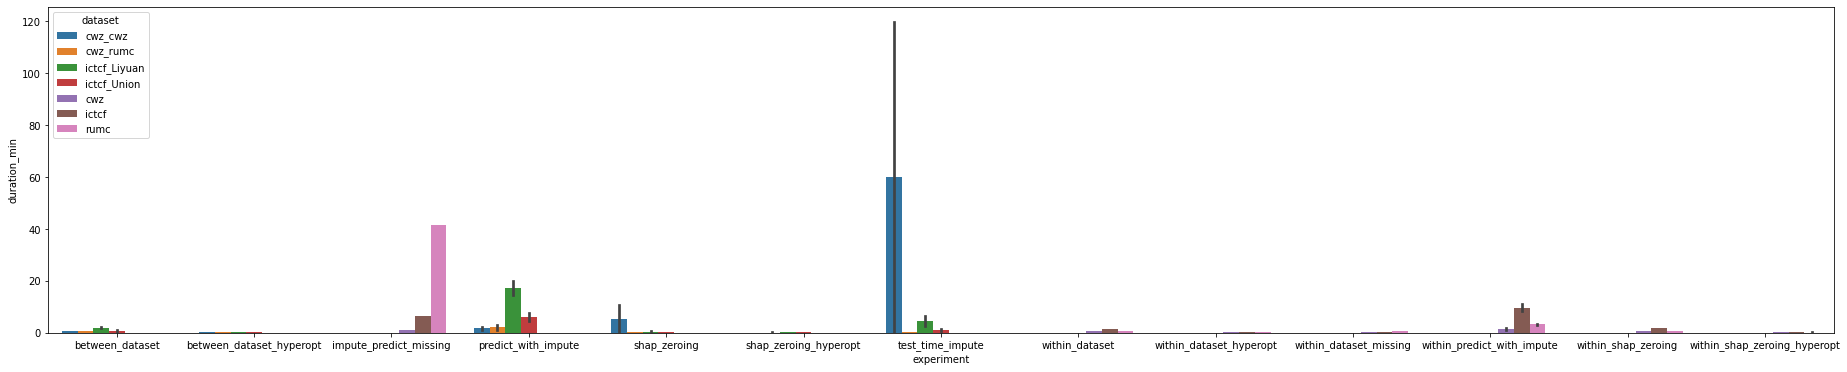

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(32, 6))
sns.barplot(data=times_df, x='experiment', y='duration_min', hue='dataset')

In [69]:
times_df.duration_min.sum()/60

5.119020219444446

In [17]:
list(experiments.iterdir())

[WindowsPath('../../experiments/between_dataset'),
 WindowsPath('../../experiments/between_dataset_hyperopt'),
 WindowsPath('../../experiments/impute_predict_missing'),
 WindowsPath('../../experiments/predict_with_impute'),
 WindowsPath('../../experiments/shap_zeroing'),
 WindowsPath('../../experiments/shap_zeroing_hyperopt'),
 WindowsPath('../../experiments/test_time_impute'),
 WindowsPath('../../experiments/within_dataset'),
 WindowsPath('../../experiments/within_dataset_hyperopt'),
 WindowsPath('../../experiments/within_dataset_missing')]